In [ ]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import MC
from MC import MC_node,mc_sim
from tictactics_policy import tictactics_simulation_policy as sim_pol
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,4),(1,4),(0,8),(4,3),(8,1)]:
    board[x]=1
for o in [(1,0),(0,7),(1,7),(3,5),(8,7)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(4,5),(4,6),(4,0),(5,1),(6,4),(1,5),(5,7),(8,4),(6,5),(1,8),(5,6),(6,0),(0,0),(1,2),(5,8),(6,6),
             (0,2),(1,6),(4,2),(4,8),(3,6),(2,1),(7,5)]:
    game.update_move(move)
log_len = len(game.log)

root = MC_node(game,1)

tact.fancy_board(game)

# cProfile.run('mc_sim(root,game,branch = 50,passes = 1000000,eval_fun = None)',sort = 'tottime')
mc_sim(root,game,branch = 50,passes = 200000000,eval_fun = None)

18098798562436989208
this node has 3 children
move:(3, 7), runs: 30095620, eval:+0.3111, principal:37 24 73 32 27 85 68 06 01 23 62 28 76 50 61 05 26 72 38 03 20 80 
move:(3, 8), runs:  1533437, eval:+0.4833, principal:38 06 11 44 33 22 77 53 80 71 55 86 70 52 67 23 62 28 76 30 20 82 
move:(4, 7), runs:    10942, eval:+0.6965, principal:47 44 53 62 28 77 34 

37 24 73 32 27 85 68 06 01 23 62 28 76 50 61 05 26 72 38 03 20 80 70 31 25 78 47 33 22 86 71 34 13 30 11 55 67 83 82 88 77 54 63 52 53 44 


nodes visited   70
cache space     30000034
nodes stored    50
nodes forgotten 0
current depth   0
current node    
role: min
  root: work:        44 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 

role: max
(7, 4): work:         1 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(7, 3): work:         7 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(8, 3): work:         7 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 
(8, 5): work:        28 pn0:      0 pn1:      0 dn0:    INF dn1:    INF 

time 0.00575559907702

(7, 3)(3, 2)
	(2, 6)(7, 2)
		(4, 7)(4, 4) p1win
(7, 4)(4, 4) p1win
(8, 3)(7, 2)
	(4, 7)(4, 4) p1win
(8, 5)(8, 8)
	(6, 7)(0, 5)
		(2, 6)(7, 2)
			(4, 7)(4, 4) p1win
	(7, 6)(3, 2)
		(2, 6)(7, 2)
			(4, 7)(4, 4) p1win
	(7, 7)(4, 4) p1win
	(8, 6)(7, 2)
		(4, 7)(4, 4) p1win


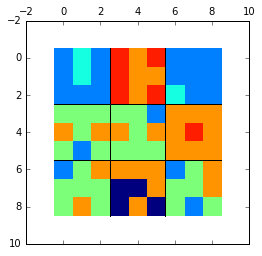

In [7]:
import sys
sys.path.append('../')

import tictactics_cython as tact
from tictactics_cython import Board
import dfpn_multi as dfpn
import matplotlib
import numpy as np
import cProfile
from matplotlib import pyplot as plt
import time
%matplotlib inline

board = np.zeros((9,9))
for x in [(0,4),(1,4),(0,8),(4,3),(8,1)]:
    board[x]=1
for o in [(1,0),(0,7),(1,7),(3,5),(8,7)]:
    board[o]=-1
big_board = np.array([[0,0,0],
                      [0,0,0],
                      [0,0,0]])

player = 1
game = Board(board=board,big_board = big_board,player = player)
for move in [(4,5),(4,6),(4,0),(5,1),(6,4),(1,5),(5,7),(8,4),(6,5),(1,8),(5,6),(6,0),(0,0),(1,2),(5,8),(6,6),
             (0,2),(1,6),(4,2),(4,8),(3,6),(2,1),(7,5),(3,8),(0,6),(2,2),(6,8),(2,7),(6,3),(2,0),(6,2),(2,8),
             (7,8),(3,7),(2,4)]:
    game.update_move(move)
log_len = len(game.log)
dfpn.init()




tact.fancy_board(game)
t0 = time.clock()
# cProfile.run('node,tree = dfpn.solve(game,root = True,epsilon=1.1)',sort = 'tottime')
node,tree = dfpn.solve(game,3,{1:0,0:1,-1:2,2:1,-2:1},0,root = True,epsilon=1.02)
print 'time',time.clock() - t0
print tree

In [ ]:
while len(game.log) > log_len:
    game.erase_move()
with open('Leigh.txt','a') as file_:
    file_.write(dfpn.get_cache(game.key))
    file_.write(tree)